# Brain Tumor Classification
#### Parsa Rezaei
#### Student ID: 1157900
#### Final Project of MRP
#### Advisor : Professor Simon Yang
refrences: 
https://www.kaggle.com/shiratorizawa/brain-tumor-detection-using-cnn


## Useful libraries

In [1]:
import cv2
import pandas
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV, KFold, train_test_split

import os
from PIL import Image
from keras.preprocessing.image import img_to_array

## Import Data

In [2]:
Tumor_types = [('glioma_tumor', 0),('meningioma_tumor', 1),('no_tumor', 2),('pituitary_tumor', 3)]
Training_path = r'C:\Users\ParsaRz\Desktop\image processing\Brain-MRI\Training\\'
Testing_path = r'C:\Users\ParsaRz\Desktop\image processing\Brain-MRI\Testing\\'

In [3]:
Main_Path = [
    r'C:\Users\ParsaRz\Desktop\image processing\Brain-MRI\Training\glioma_tumor\gg (1).jpg'  ,
    r'C:\Users\ParsaRz\Desktop\image processing\Brain-MRI\Training\meningioma_tumor\image(4).jpg',
    r'C:\Users\ParsaRz\Desktop\image processing\Brain-MRI\Training\no_tumor\image(1).jpg'    ,
    r'C:\Users\ParsaRz\Desktop\image processing\Brain-MRI\Training\pituitary_tumor\image(1).jpg',
]

## Image processing, showing and resizing the data

In [4]:
def display (img_array) :
    
    dim = 10
    
    plt.figure(figsize  = (dim , dim))
    for i, img in enumerate(img_array) :
        plt.subplot(2, 2, i+1)
        plt.imshow(img,'gray')
        plt.title(img.shape)
        
    plt.show()
    
def get_array (Main_Path) :
    
    X = []
    y = []
    
    for typ, val in Tumor_types :
        for image in os.listdir(Main_Path +typ) :
            img = cv2.resize(cv2.imread(Main_Path +typ+'/'+image, cv2.IMREAD_GRAYSCALE), (180,180))
            
            # create arrays
            X.append(img_to_array( Image.fromarray(img)))
            y.append(val)
    return X, y 

In [5]:
def get_array (Main_Path) :
    
    X = []
    y = []
    
    for typ, val in Tumor_types :
        for image in os.listdir(Main_Path+typ) :
            img = cv2.resize(cv2.imread(Main_Path+typ+'/'+image, cv2.IMREAD_GRAYSCALE), (180,180))
            
            # create arrays
            X.append(img_to_array( Image.fromarray(img)))
            y.append(val)
    return X, y

In [6]:
image_array = []
for i, image_path in enumerate(Main_Path) :
    image_array.append(cv2.resize(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), (180,180)))

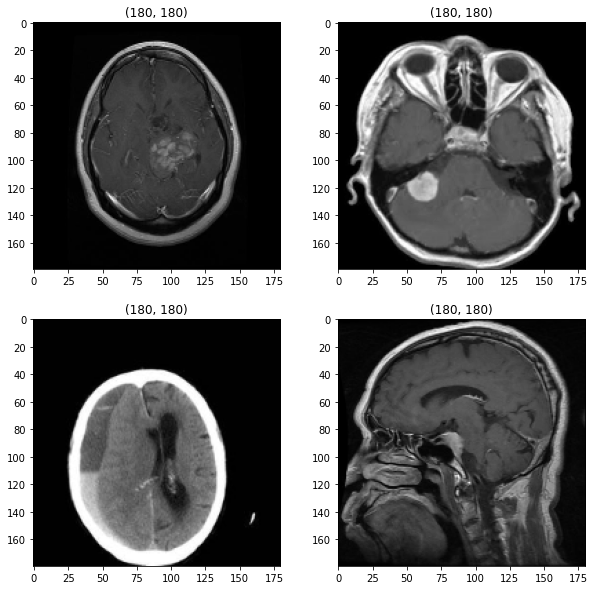

In [7]:
display(image_array)

## Convert Images to Numpy arrays

In [8]:
X_train, y_train = get_array(Training_path)

X_test , y_test  = get_array(Testing_path)

X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)

X_train = np.array(X_train)
X_train/= 255.0

y_train = np.array(keras.utils.to_categorical(y_train))

X_test = np.array(X_test)
X_test/= 255.0

y_test = np.array(keras.utils.to_categorical(y_test))

In [9]:
print(X_train.shape)
print(y_train.shape)

(3265, 180, 180, 1)
(3265, 4)


In [10]:
print(X_test.shape)
print(y_test.shape)

(394, 180, 180, 1)
(394, 4)


## Plots of some Training Samples

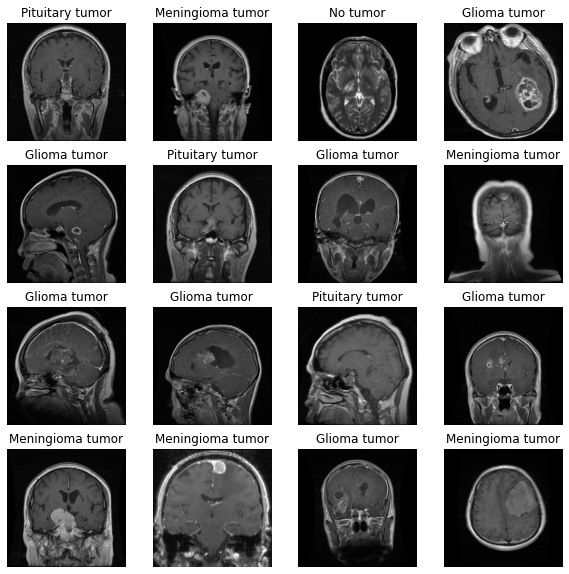

In [11]:
Data = {0 : 'Glioma tumor', 1 : 'Meningioma tumor', 2 : 'No tumor', 3 : 'Pituitary tumor'}

plt.figure(figsize = (10,10))
for i in range(16) :
    plt.subplot(4, 4, i+1)
    x = np.random.randint(0, 2870)
    plt.imshow(X_train[x], 'gray')
    plt.title(Data[np.argmax(y_train[x])])
    plt.axis('off')
plt.show()

### Synthetic Minority Oversampling
#### Glioma tumor, Meningioma tumor and Pituitary tumor almost same number of datasets ie. 826, 822 and 827 respectively. But the label no_tumor has only 395 samples. Since the number of samples for no_tumor class is less,Therefor we use SMOTE from imblearn package for oversample that class.


In [12]:
X_train = np.reshape(X_train, (3265, 180*180*1))
print(X_train.shape)
print(y_train.shape)

(3265, 32400)
(3265, 4)


In [13]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = 1, k_neighbors = 5).fit_resample(X_train, y_train)

print(X_train.shape)
print(y_train.shape)

(3748, 32400)
(3748, 4)


In [14]:
X_train = np.reshape(X_train, (3748, 180, 180, 1))
print(X_train.shape)
print(y_train.shape)

(3748, 180, 180, 1)
(3748, 4)


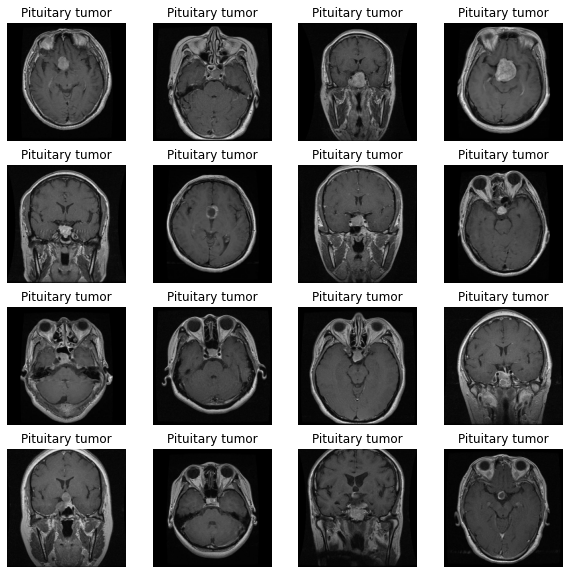

In [15]:
plt.figure(figsize = (10,10))
for i in range(16) :
    plt.subplot(4, 4, i+1)
    x = np.random.randint(2870, 3308)
    plt.imshow(X_train[x], 'gray')
    plt.title(Data[np.argmax(y_train[x])])
    plt.axis('off')
plt.show()

## Plots of some Training Samples

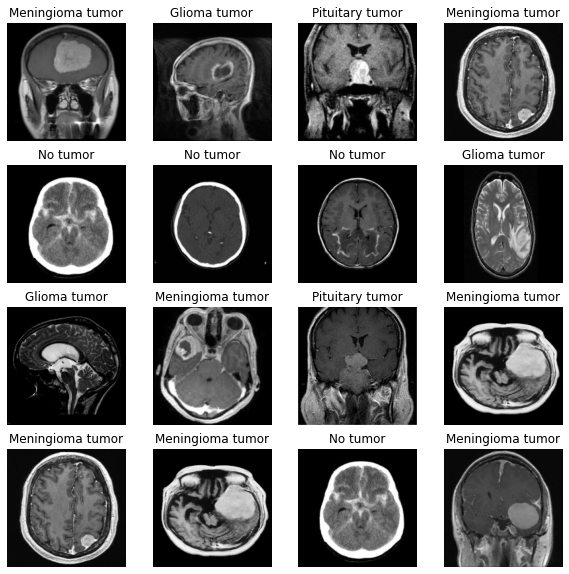

In [16]:
plt.figure(figsize = (10,10))
for i in range(16) :
    plt.subplot(4, 4, i+1)
    x = np.random.randint(0,390)
    plt.imshow(X_test[x],'gray')
    plt.title(Data[np.argmax(y_test[x])])
    plt.axis('off')
plt.show()

## Model creation and training

In [17]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten

from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D

from keras.layers import Dropout
from keras.layers import Conv2D

In [18]:
def conv_layer (filterx) :
    
    model = Sequential()
    model.add(Conv2D(filterx, (3,3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))
    model.add(BatchNormalization())
    
    return model

In [19]:
def dens_layer (hiddenx) :
    
    model = Sequential()
    model.add(Dense(hiddenx, activation = 'relu', kernel_regularizer = 'l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model

In [20]:
def cnn (filter1, filter2, filter3, hidden1, hidden2) :
    
    model = Sequential()
    
    model.add(Input((180,180,1,)))
    model.add(conv_layer(filter1))
    model.add(conv_layer(filter2))
    model.add(conv_layer(filter3))
    
    model.add(Flatten())
    model.add(dens_layer(hidden1))
    model.add(dens_layer(hidden2))
    model.add(Dense(4, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])
    
    return model

## Use image data augmentation

In [21]:
print(X_train.shape)
print(y_train.shape)

(3748, 180, 180, 1)
(3748, 4)


In [22]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(zoom_range = [0.85, 1.0], rotation_range = 3)

In [23]:
gen.fit(X_train)
train_gen = gen.flow(X_train, y_train, batch_size = 32)

In [24]:
trainX, trainy = train_gen.next()

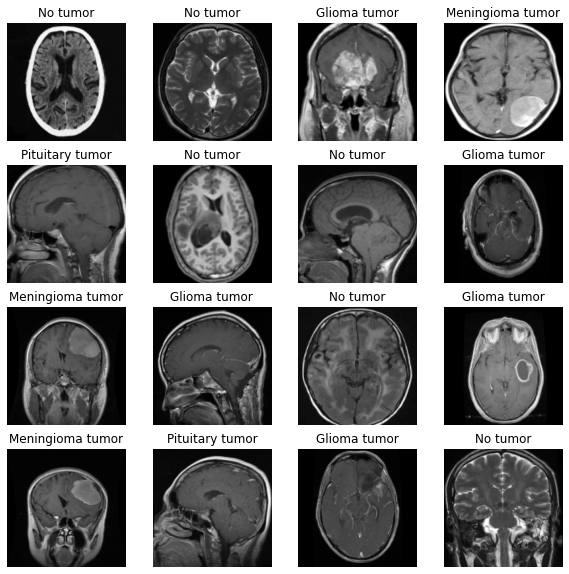

In [25]:
plt.figure(figsize = (10,10))
for i in range(16) :
    plt.subplot(4, 4, i+1)
    plt.imshow(trainX[i], 'gray')
    plt.title(Data[np.argmax(trainy[i])])
    plt.axis('off')
plt.show()

## Model implementation

In [26]:
from keras.callbacks import ModelCheckpoint
checkp = ModelCheckpoint('./brain_model.h5', monitor = 'val_accuracy', save_best_only = True, verbose = 1)

model = cnn(128, 64, 32, 128, 64)

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 90, 90, 128)       1792      
_________________________________________________________________
sequential_2 (Sequential)    (None, 45, 45, 64)        74048     
_________________________________________________________________
sequential_3 (Sequential)    (None, 22, 22, 32)        18592     
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 128)               1983104   
_________________________________________________________________
sequential_5 (Sequential)    (None, 64)                8512      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2

In [27]:
history = model.fit(gen.flow(X_train, y_train, batch_size = 32), epochs = 10, validation_data = (X_test,y_test), callbacks = [checkp])

Epoch 1/10
118/118 [==============================] - 191s 2s/step - loss: 4.3499 - accuracy: 0.6275 - val_loss: 6.1620 - val_accuracy: 0.2538

Epoch 00001: val_accuracy improved from -inf to 0.25381, saving model to .\brain_model.h5
Epoch 2/10
118/118 [==============================] - 192s 2s/step - loss: 3.9098 - accuracy: 0.7535 - val_loss: 7.3723 - val_accuracy: 0.2081

Epoch 00002: val_accuracy did not improve from 0.25381
Epoch 3/10
118/118 [==============================] - 201s 2s/step - loss: 3.6857 - accuracy: 0.7874 - val_loss: 6.2802 - val_accuracy: 0.3173

Epoch 00003: val_accuracy improved from 0.25381 to 0.31726, saving model to .\brain_model.h5
Epoch 4/10
118/118 [==============================] - 217s 2s/step - loss: 3.4655 - accuracy: 0.8266 - val_loss: 5.7614 - val_accuracy: 0.4213

Epoch 00004: val_accuracy improved from 0.31726 to 0.42132, saving model to .\brain_model.h5
Epoch 5/10
118/118 [==============================] - 217s 2s/step - loss: 3.2814 - accuracy:

## Visualize loss and Accruracy plots vs Epochs for Traing and Validation

Text(0.5, 1.0, 'Loss vs Epochs')

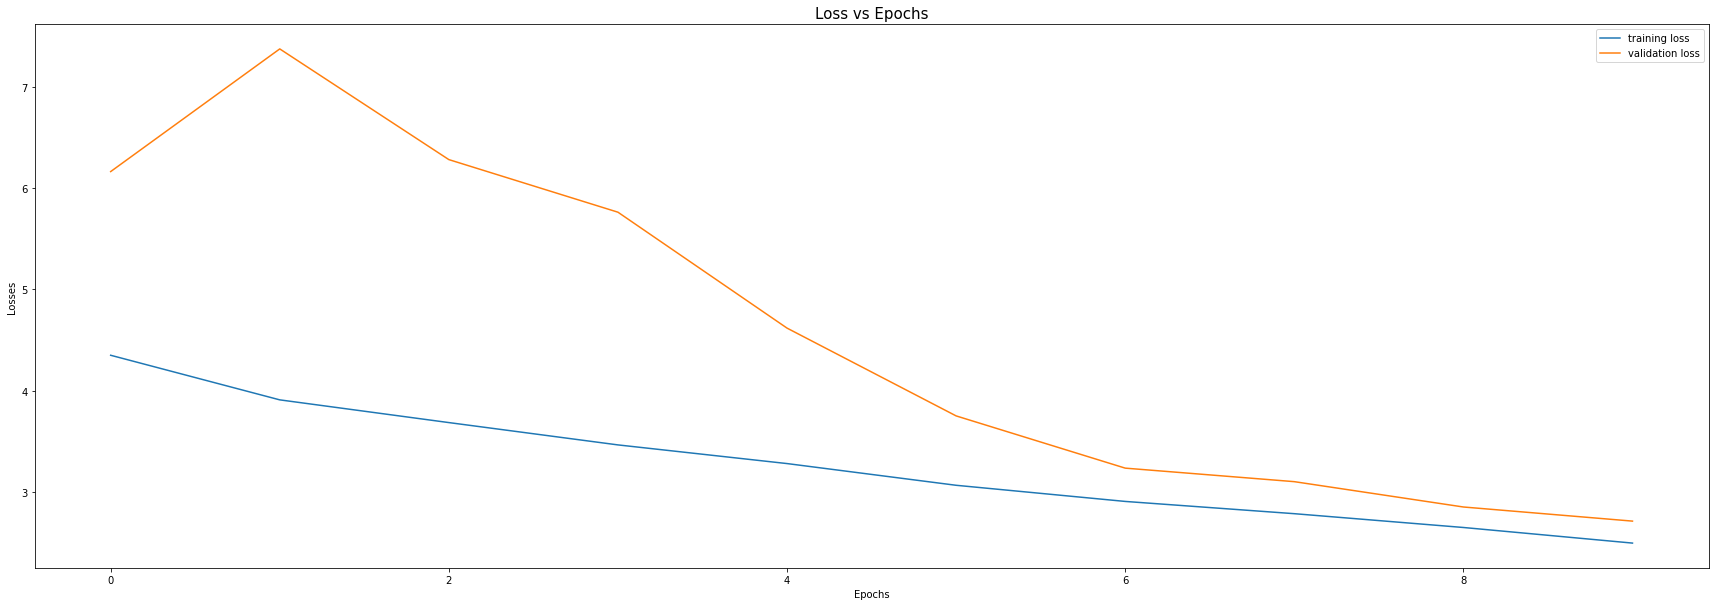

In [28]:
plt.figure(figsize = (30,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Loss vs Epochs', fontsize = 15)

Text(0.5, 1.0, 'Accuracy vs Epochs')

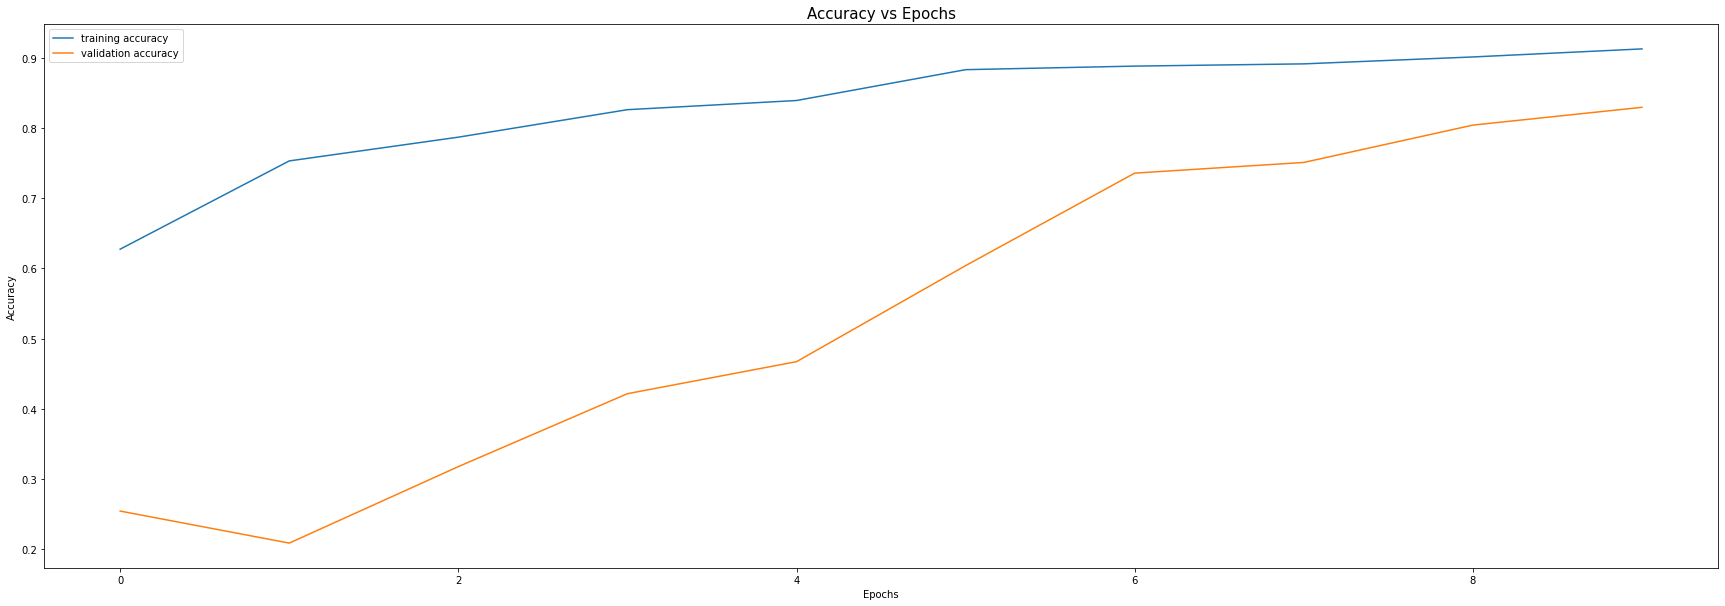

In [29]:
plt.figure(figsize = (30,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs', fontsize = 15)

## Prediction

In [30]:
from keras.models import load_model
model = load_model('./brain_model.h5')

pred = model.predict(X_test)

print(pred[0:3,:])

[[7.6561022e-01 1.7814722e-02 1.3347058e-01 8.3104558e-02]
 [9.7729868e-01 1.7488495e-02 4.7843424e-03 4.2847302e-04]
 [3.5129808e-02 2.9626589e-02 9.1823196e-01 1.7011732e-02]]


In [31]:
temp = np.argmax(pred, axis = 1)
pred = np.zeros(pred.shape)

In [32]:
pred[np.arange(pred.shape[0]), temp] = 1

In [33]:
print(pred[0:3,:])
print(y_test[0:3,:])

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [34]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy : ' + str(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred, target_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']))

Accuracy : 0.8299492385786802
                  precision    recall  f1-score   support

    glioma_tumor       0.82      0.68      0.74       100
meningioma_tumor       0.98      0.70      0.81       115
        no_tumor       0.70      1.00      0.82       105
 pituitary_tumor       0.95      1.00      0.97        74

       micro avg       0.83      0.83      0.83       394
       macro avg       0.86      0.84      0.84       394
    weighted avg       0.86      0.83      0.83       394
     samples avg       0.83      0.83      0.83       394

